# Crazy Corporation Credit Fraud detection
Below we are going to start the preprocessing of data and implementation of a Logical regression model.

## Imported libraries
Below is the libraries necessary for this project. This is ran in a virtual environment sperate from system environments.

In [30]:

#importation of libraries needed for the project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings

warnings.filterwarnings("ignore")


## Data importation, Analysis, and Preprocessing
THe data used in this is provided from this [source](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download). Importation, Analysis, and Preprocessing are used on the data to use it in this Python environment.

### Importation
The codeblock below imports the data from its source format (CSV) to a Pandas DataFrame. The imported data is shown below. The head is only showing 20 lines of the file. The source file is actually much larger than 20.

In [31]:
#import csv with data into a pandas DataFrame
df = pd.read_csv("./testdata/creditcard.csv")
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Analysis
#### Time
Time, in this dataset, is used to demark the time a transaction took place sequentially within the dataset. Because of this I decided on not scaling it and using it as an identifier.
#### V1-V28
The most prominent features are labeled with a V followed by an index.
#### Amount
Amount could be relavent so it should be considered in the model's training.
#### Description
Below is the description of the data. These values, specifically the values for mean and standard deviation, are usfull in determining how spread the data is.

In [32]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking for NULL values
When using Pandas, a missing value is denoted by the use of NULL. Although this dataset does not have any missing values as per the exploration of the chosen dataset. BUt just to verify the codeblock below outputs the sum of null values amongst the data.

In [33]:
print(f"Number of null cells: {df.isnull().sum().max()}")

Number of null cells: 0


### Scaling data
Time and ammount should be scaled similarly to the other factors.

In [34]:
from sklearn.preprocessing import RobustScaler

rbst_scaler = RobustScaler()

df['scaled_time'] = rbst_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount'] = rbst_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

df.insert(0, 'scaled_time', scaled_time)
df.insert(29, 'scaled_amount', scaled_amount)

df.head()

,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


### Balance of Data
This dataset has a binary classifier that is used to denote which transaction is fraud and which is a normal transaction. 0 is the value for a normal transaction and 1 is the value for fraud. In the set description, it warns users that the data is extremely imbalanced. The next two code blocks are dedicated to providing a quantitaive value for how imbalanced as well as a visualization of such.

In [35]:
print(f"Not Fraud percent:{round(df['Class'].value_counts()[0]/len(df) * 100 ,2)}")
print(f"Fraud percent:{round(df['Class'].value_counts()[1]/len(df) * 100 ,2)}")

Not Fraud percent:99.83
Fraud percent:0.17


<Axes: xlabel='Class', ylabel='count'>

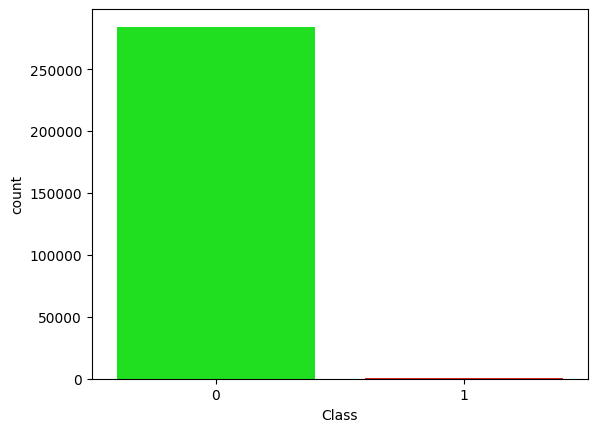

In [36]:
colors = ["#00FF00", "#FF0000"]

sns.countplot( x=df['Class'],data=df, palette=colors)

#### Correlation Before Preprocessing
Below is the heatmap showing the correlation between features. The main correlation row to pay attention to is the last one relating to Class. This shows which features, in relation to fraud and non-fraud, have the most impact on classification. 

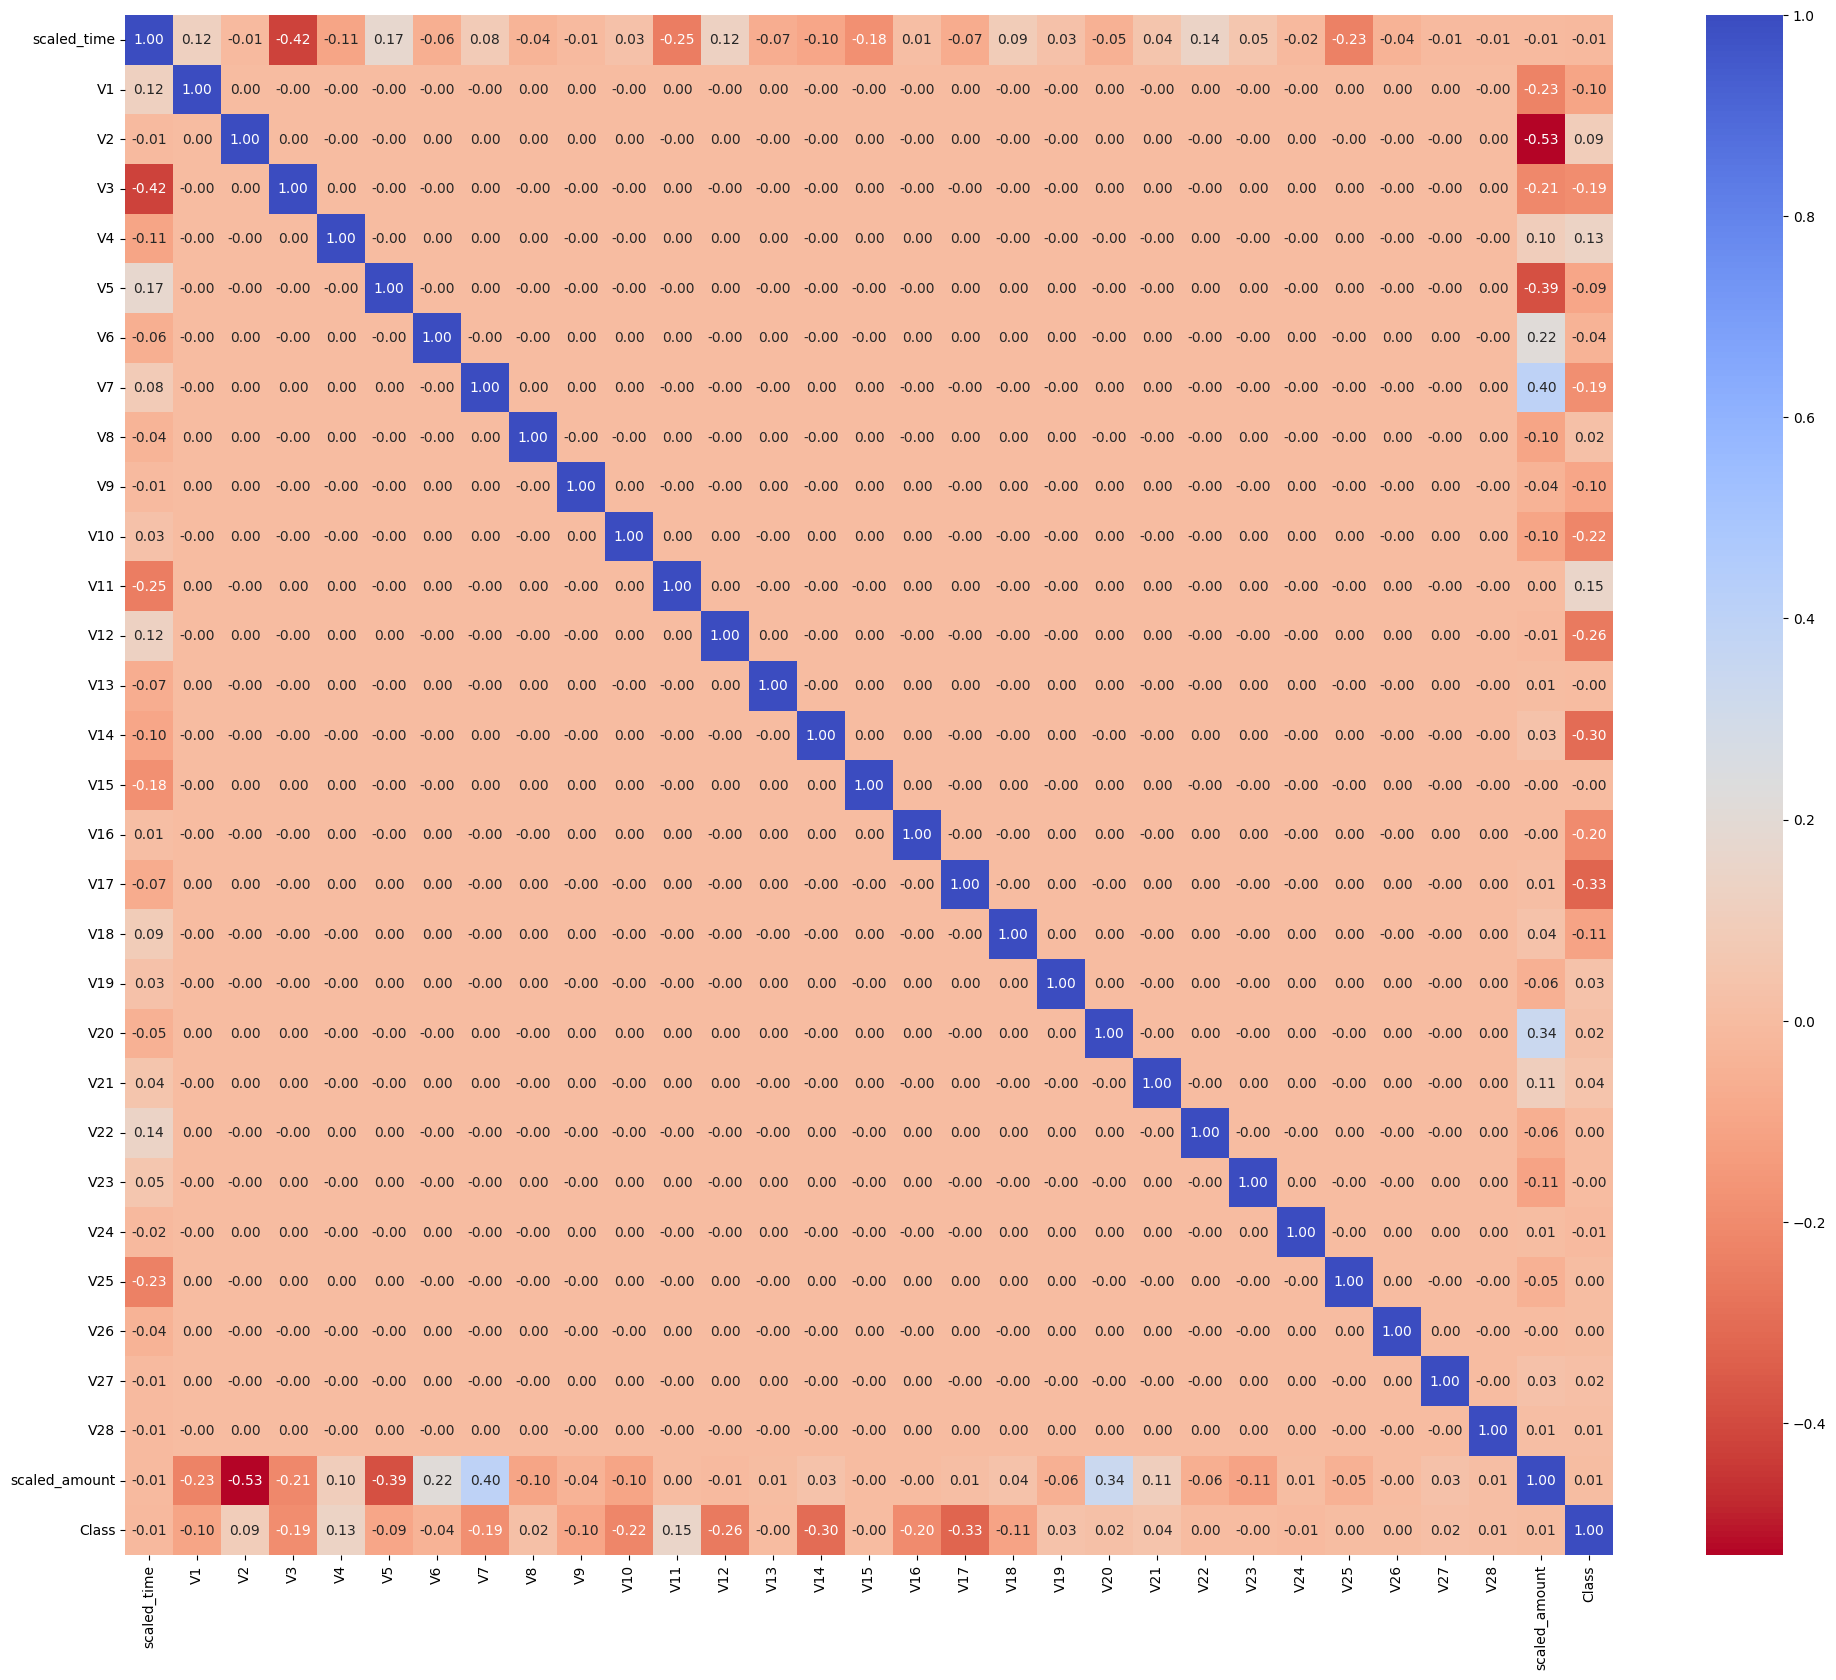

In [37]:
#Heatmap of the unbalanced data post scaling
f, ax1 = plt.subplots(figsize=(24,20))
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm_r',ax=ax1,  fmt=".2f", annot=True)
plt.show()

#### Results
There doesnt seem to be any major correlation between any features and rhe classification.

### Balancing data
As stated earlier the dataset is extremely imbalanced. Balancing the data will allow the model to more accurately find a best fit logistic regression sigmoid. In this dataset there are 492 cases of fraud. We are going to use them all. After seperating the fraudulent charges from the entire dataset, we need to seperate an equal ammount of non-fraudulent charges. We do this while measuring the length of the fraud dataset and use slicing.

In [38]:
#sample dataframe for 100% of data 
df = df.sample(frac=1, random_state=65)

#create seperate dataframe for both fraud and non-fraud (Limited to the same size as fraud)
df_fraud = df.loc[df["Class"] == 1]
df_not_fraud = df.loc[df["Class"] == 0][:len(df_fraud)]

#Concatenating data and resampling using an arbitrary randome seed (in this case 67) 
df_balanced_unshuffled = pd.concat([df_fraud,df_not_fraud])
df_balanced_shuffled = df_balanced_unshuffled.sample(frac=1,random_state=67)

#Display new dataframe
df_balanced_shuffled.head(20)

,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,Class
38185,-0.533430,-0.911294,0.666409,2.199910,0.226877,-0.670843,-0.367088,1.883664,-0.660710,0.003464,...,-0.284338,-0.200033,-0.103968,0.965690,0.358173,0.220202,-0.122241,-0.360102,2.247048,0
279651,0.990601,2.194554,-1.316301,-2.597061,-1.628534,-0.270672,-1.289384,0.060777,-0.541706,-2.278467,...,0.203563,0.882734,-0.271184,-0.344515,0.600325,0.299330,-0.091896,-0.086769,1.196535,0
87991,-0.267367,-1.076737,1.047883,0.912922,0.012283,-0.181084,-0.900659,0.585685,0.301539,-1.039970,...,0.154095,0.177746,-0.191024,0.559954,-0.042617,0.279307,-0.183728,-0.014301,0.242018,0
123465,-0.091108,1.307375,-1.268579,0.809139,-1.453810,-1.589758,0.001456,-1.288295,0.104611,-1.984084,...,-0.160495,-0.181613,0.105460,-0.009427,0.045288,-0.327643,0.058434,0.028170,0.600852,0
20253,-0.632033,0.195828,0.741462,0.901269,1.540810,-0.031628,-0.498781,1.206245,-0.507318,-0.631834,...,0.245527,0.915304,0.222742,0.425309,-1.072949,-0.351583,0.111524,0.044022,1.099839,0
150677,0.107931,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,...,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,0.116118,1
103587,-0.187608,-5.202478,3.247612,-2.252825,-2.256571,0.580310,5.439003,-4.605608,-9.059415,-0.331893,...,10.020588,-3.554443,1.725852,0.809685,-0.106227,-0.376554,-1.019638,0.038681,-0.279466,0
266287,0.911406,-0.538400,0.551203,1.153902,0.597954,1.088763,1.665761,1.640417,-0.776593,0.797664,...,-0.683487,-0.775580,0.047477,-0.240631,-0.724172,-1.139142,-0.581142,-0.626623,1.201006,0
41738,-0.515572,0.333864,-1.899167,0.385888,-0.655656,-1.463759,0.100152,-0.246452,0.153275,1.675527,...,0.475172,0.659979,-0.494987,0.067566,0.366871,-0.612771,0.028165,0.093657,5.721093,0
143188,0.005745,-3.003459,2.096150,-0.487030,3.069453,-1.774329,0.251804,-4.328776,-2.425478,-0.985222,...,0.163967,1.245648,-0.269241,0.537102,-0.220757,-0.059555,0.460710,-0.033551,-0.279466,1


#### New Countplot with Balanced Dataset
Below is a visual representation of the newly balanced data.

<Axes: xlabel='Class', ylabel='count'>

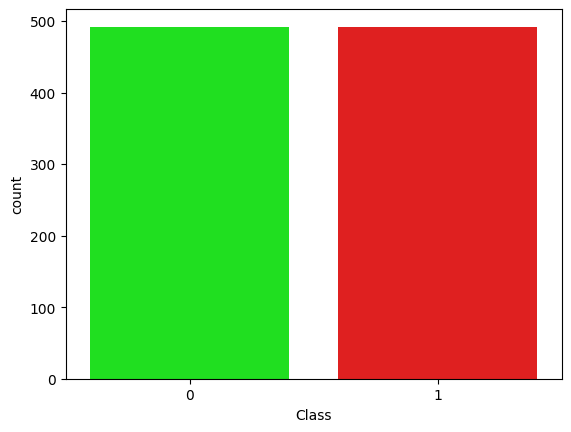

In [39]:
#Colors associated with different classes
colors = ["#00FF00", "#FF0000"]

#countplot that displays balanced data counts based on class
sns.countplot( x=df_balanced_shuffled['Class'],data=df_balanced_shuffled, palette=colors)

#### New Correlation Heatmap
It is necessary to review the correlation heatmap again because we have a subset of data that is more balanced. This allows correlation to be more present than when comparing with a dataset that is highly imbalanced. Below is the analysis of the figure.


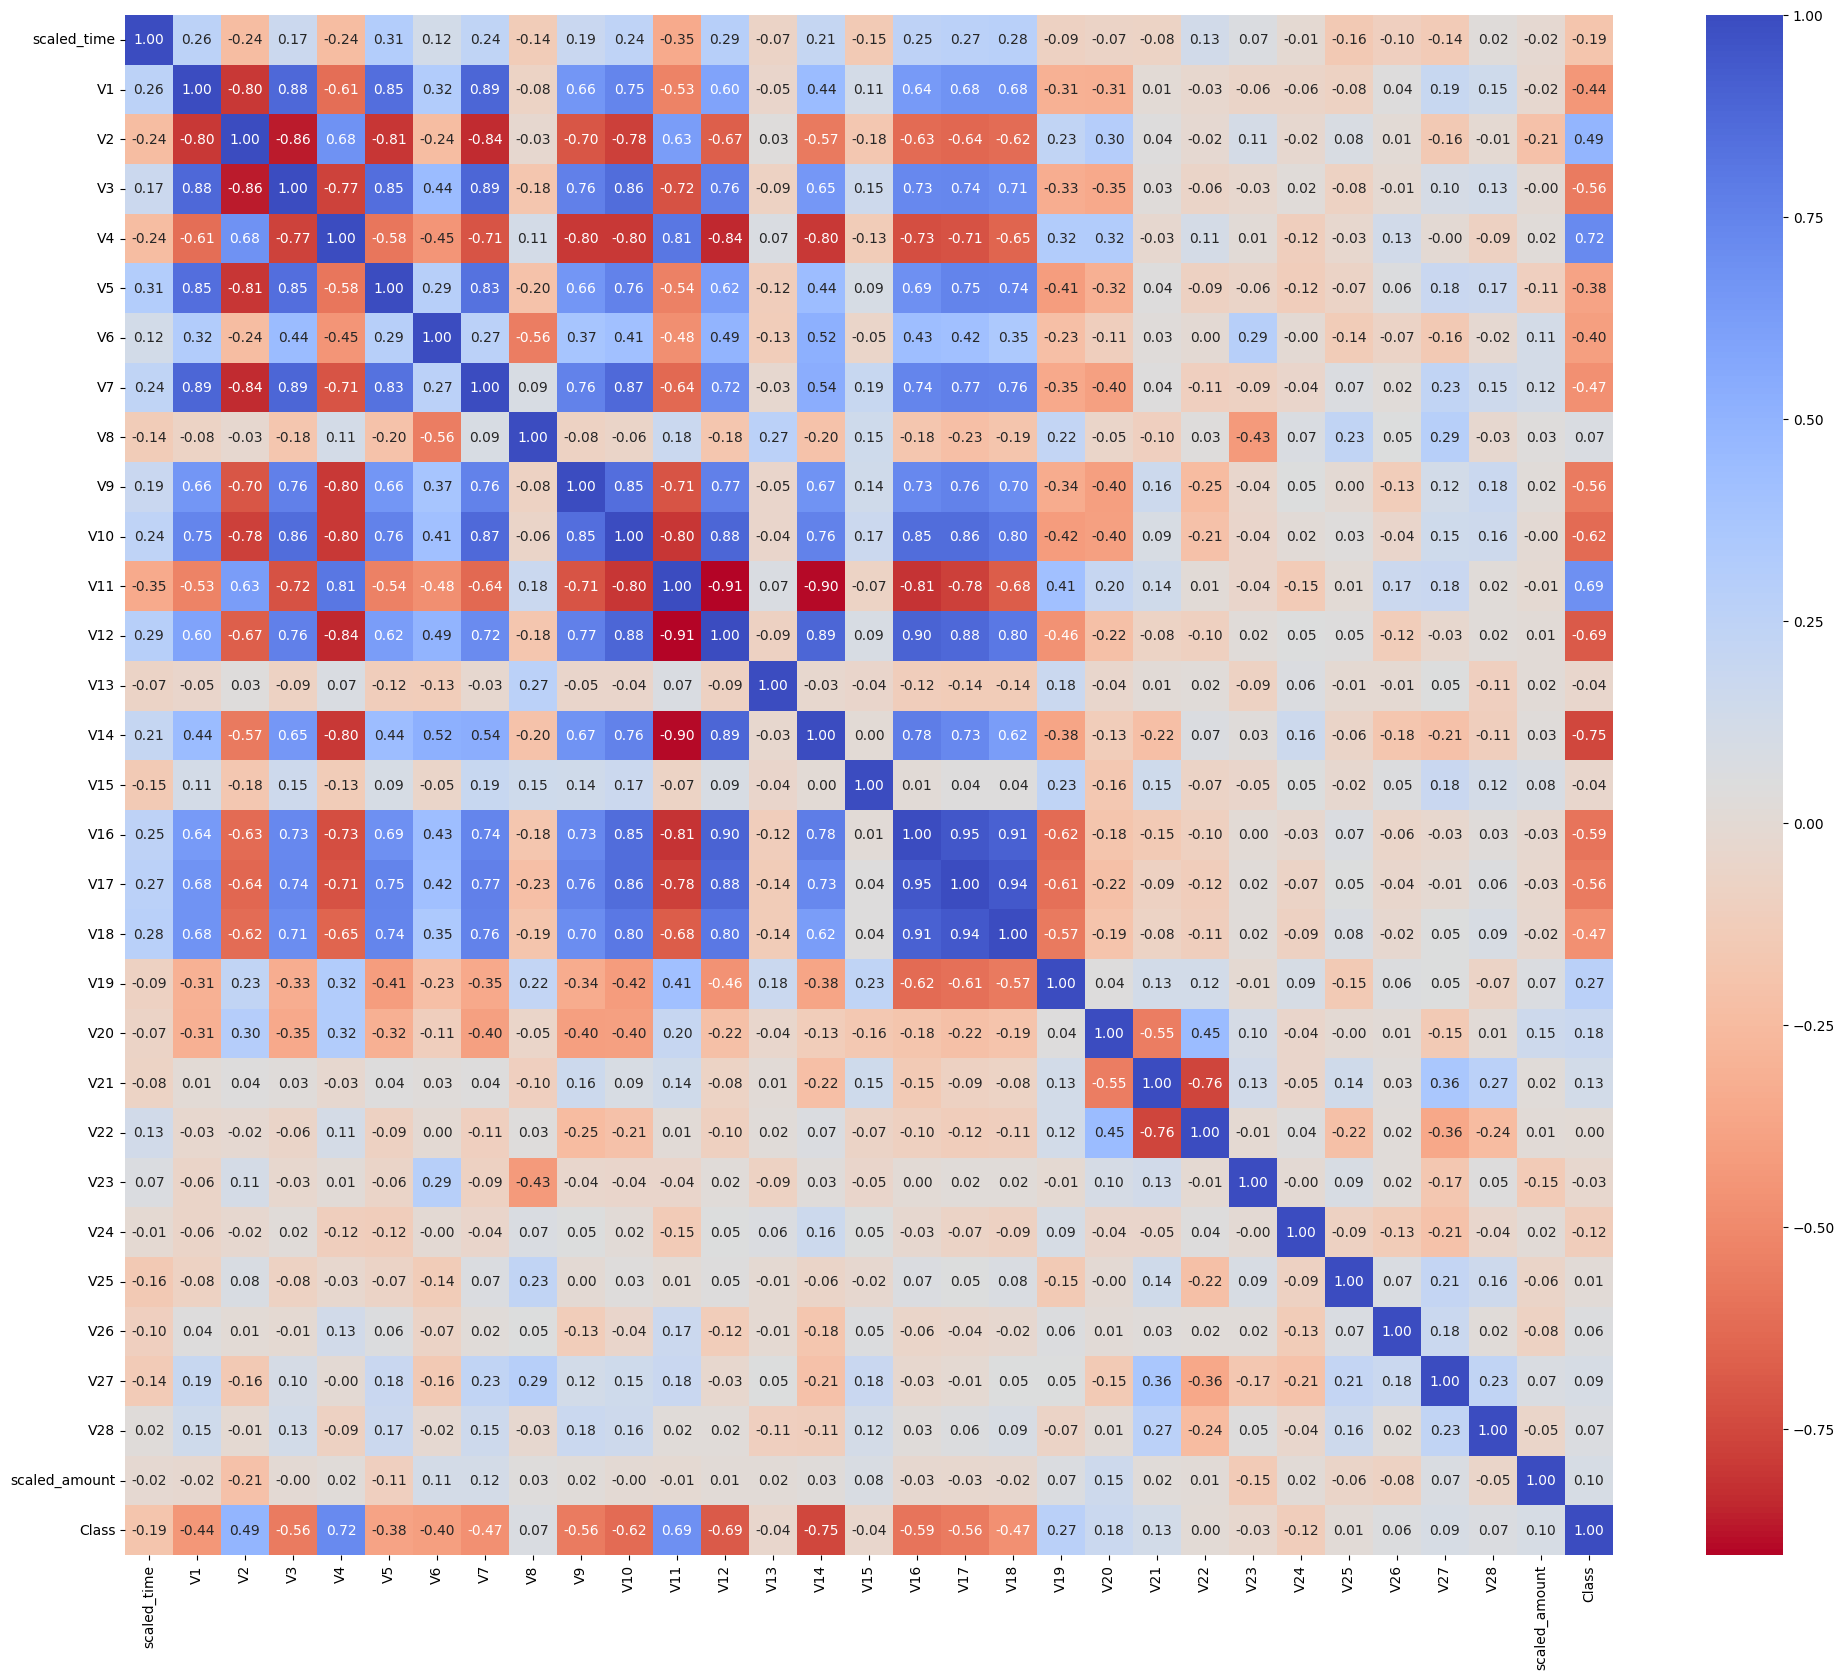

In [40]:
#Heatmap of balanced data
fig, ax1 = plt.subplots(figsize=(24,20))
correlation = df_balanced_shuffled.corr()
sns.heatmap(correlation, cmap='coolwarm_r',ax=ax1, fmt=".2f", annot=True)
plt.show()

##### Negative Correlated Features
There is a negative correlation between Class (Classifier) and v14, v12, v16, v10. Below are boxplots for each feature with a negative feature to see if there are extremes for fraud case that need to be filtered out for a more refined model.

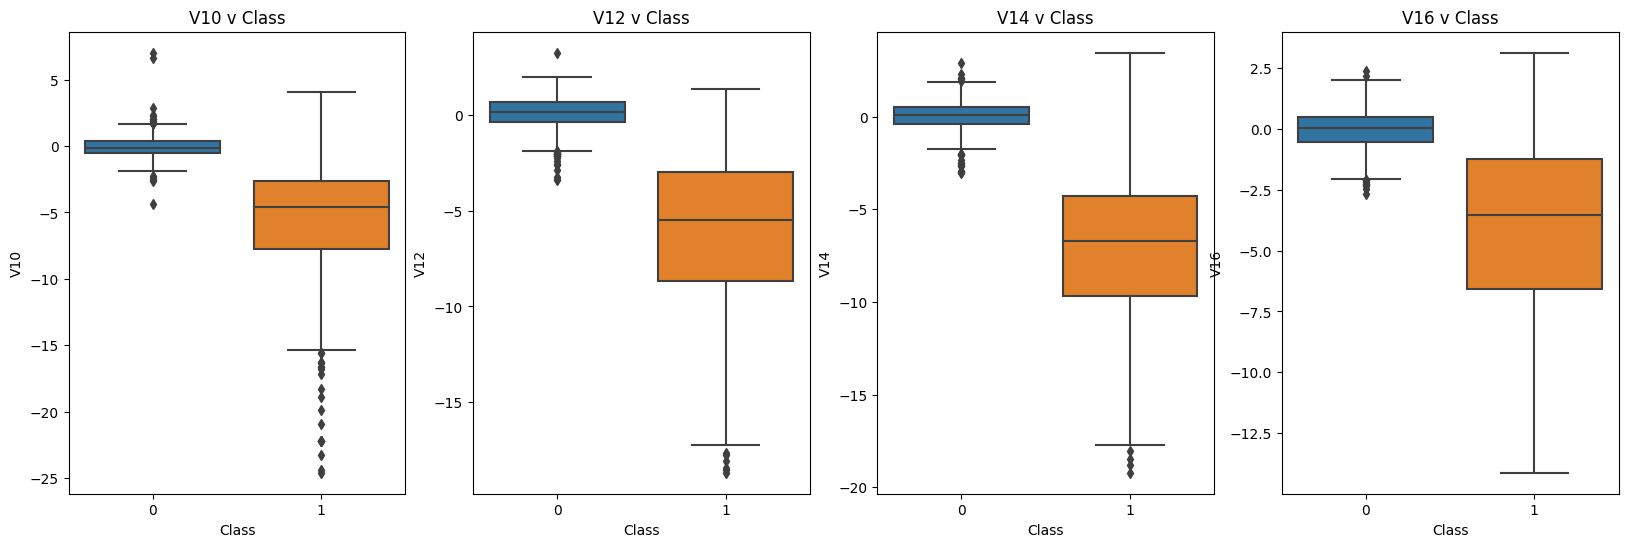

In [41]:
#Figure and number of slots
fig, axes = plt.subplots(ncols=4, figsize=(20,6))

#V10 boxplot
sns.boxplot(x="Class", y="V10", data=df_balanced_shuffled, ax=axes[0])
axes[0].set_title("V10 v Class")

#V12 boxplot
sns.boxplot(x="Class", y="V12", data=df_balanced_shuffled, ax=axes[1])
axes[1].set_title("V12 v Class")

#V14 boxplot
sns.boxplot(x="Class", y="V14", data=df_balanced_shuffled, ax=axes[2])
axes[2].set_title("V14 v Class")

#V16 Boxplot
sns.boxplot(x="Class", y="V16", data=df_balanced_shuffled, ax=axes[3])
axes[3].set_title("V16 v Class")


plt.show()

##### Positive Correlated Features
There is a positive correlation for features v4, v11, v2. Below is the same boxplot sceme used for the positive correlated features.

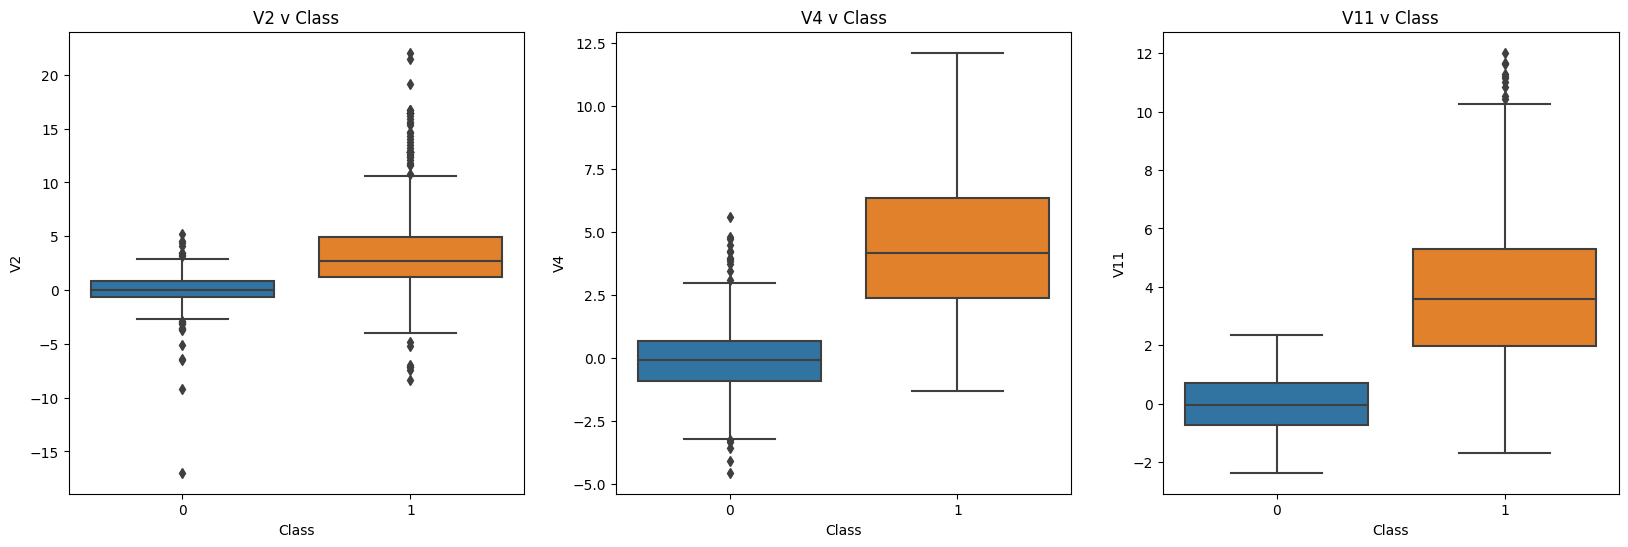

In [42]:
#Figure and number of slots
fig, axes = plt.subplots(ncols=3, figsize=(20,6))

#V2 boxplot
sns.boxplot(x="Class", y="V2", data=df_balanced_shuffled, ax=axes[0])
axes[0].set_title("V2 v Class")

#V4 boxplot
sns.boxplot(x="Class", y="V4", data=df_balanced_shuffled, ax=axes[1])
axes[1].set_title("V4 v Class")

#V11 boxplot
sns.boxplot(x="Class", y="V11", data=df_balanced_shuffled, ax=axes[2])
axes[2].set_title("V11 v Class")

#showing figure
plt.show()

##### Distribution Plots
Each of the following two sections are used to display the data found above for fraud cases in a more visual way to show breakdown of value distributions.

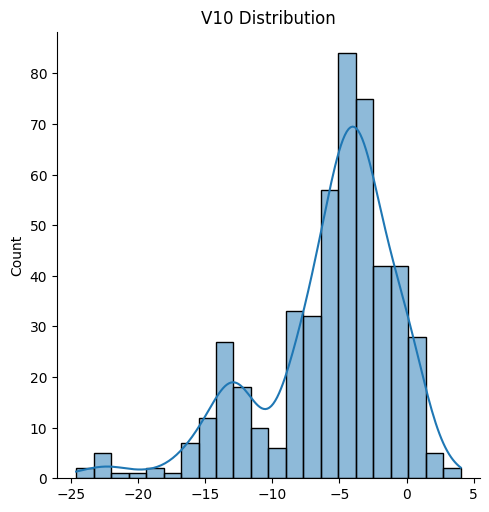

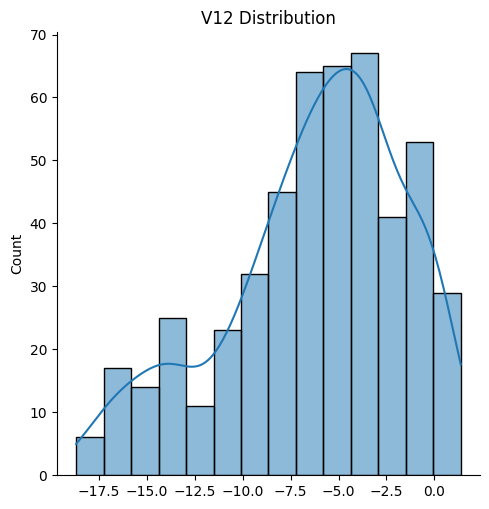

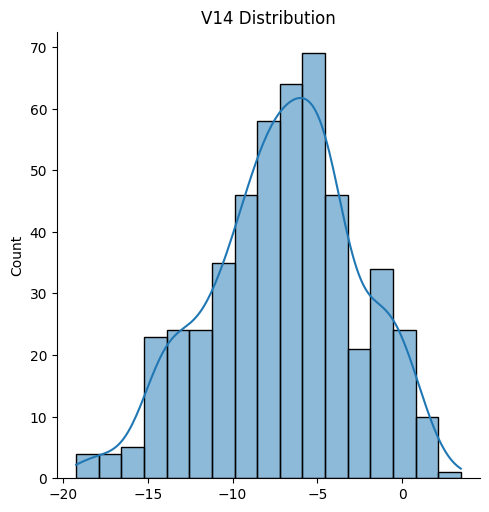

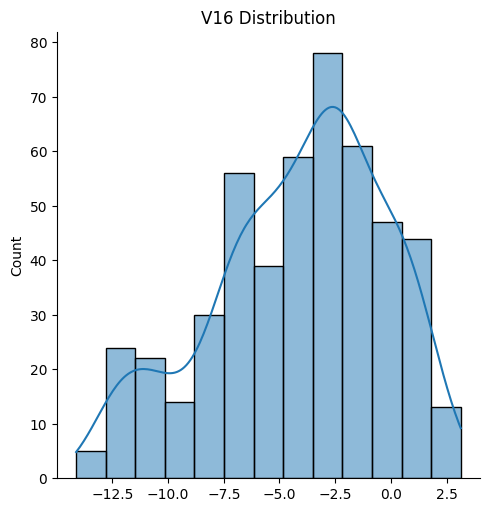

In [43]:
#Values of different negative correlation features where fraud occurs
v10_dist = df_balanced_shuffled["V10"].loc[df_balanced_shuffled["Class"] == 1].values
v12_dist = df_balanced_shuffled["V12"].loc[df_balanced_shuffled["Class"] == 1].values
v14_dist = df_balanced_shuffled["V14"].loc[df_balanced_shuffled["Class"] == 1].values
v16_dist = df_balanced_shuffled["V16"].loc[df_balanced_shuffled["Class"] == 1].values

#set plots
sns.displot(v10_dist, kde=True).set(title="V10 Distribution")

sns.displot(v12_dist, kde=True).set(title="V12 Distribution")

sns.displot(v14_dist, kde=True).set(title="V14 Distribution")

sns.displot(v16_dist, kde=True).set(title="V16 Distribution")


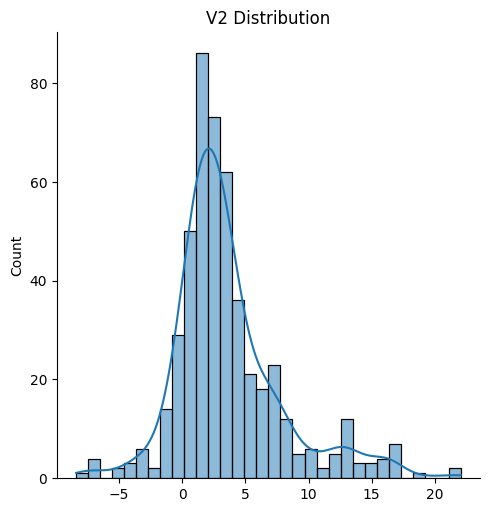

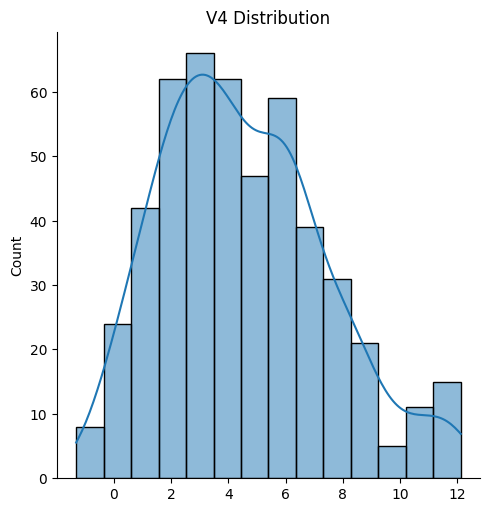

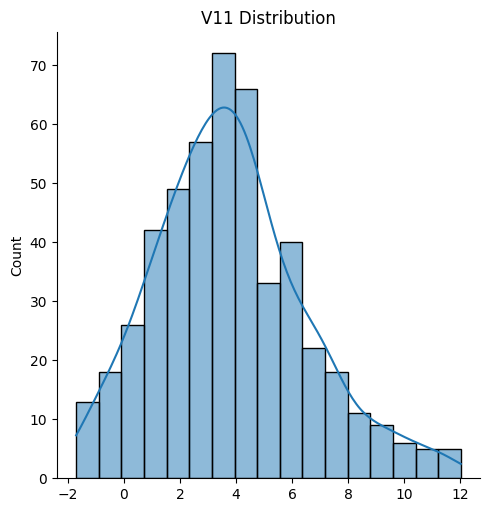

In [44]:
#Values of different negative correlation features where fraud occurs
v2_dist = df_balanced_shuffled["V2"].loc[df_balanced_shuffled["Class"] == 1].values
v4_dist = df_balanced_shuffled["V4"].loc[df_balanced_shuffled["Class"] == 1].values
v11_dist = df_balanced_shuffled["V11"].loc[df_balanced_shuffled["Class"] == 1].values

#set plots
sns.displot(v2_dist, kde=True).set(title="V2 Distribution")

sns.displot(v4_dist, kde=True).set(title="V4 Distribution")

sns.displot(v11_dist, kde=True).set(title="V11 Distribution")


##### Analysis
Based on review of distributions compared to a normal distribution. I have determined that anomolies are not extreme.
## Regression Model
Below we begin breaking down the balanced data subset that was created above into training and testing subsets.

In [45]:


x = df_balanced_shuffled.drop("Class", axis=1)
y = df_balanced_shuffled["Class"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=67)

x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values



parameters = {
    'C': [.001, .01, .1, 1, 10, 100],
    "penalty": ['l2']
}

logistic_regresion_model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logistic_regresion_model, parameters,scoring='accuracy')
grid_search.fit(x_train, y_train)

optimized_logistic_regression_model = grid_search.best_estimator_

print(f'{round(optimized_logistic_regression_model.score(x_test, y_test),4)*100}%')


93.58%


### Training Score
The percentage above is the score this model obtains using a training subset of the balanced data. Though the actual test is to see how accurate the model is in a subset of the original data in a random state.
## Overall Analaysis
Below is when we divide the overall dataset into training and testing sets. Then use it to estimate the overall accuracy of the model across a larger dataset.


In [46]:
X = df.drop("Class", axis=1)
Y = df["Class"]
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X,Y,train_size=.4, random_state=98)

### Confusion Matrix
This Confusion Matrix is used to demonstrate actual transactions, actual fraud, false fraud, false transactions. This gives use an idea how the model classifies and if there is any overfitting.

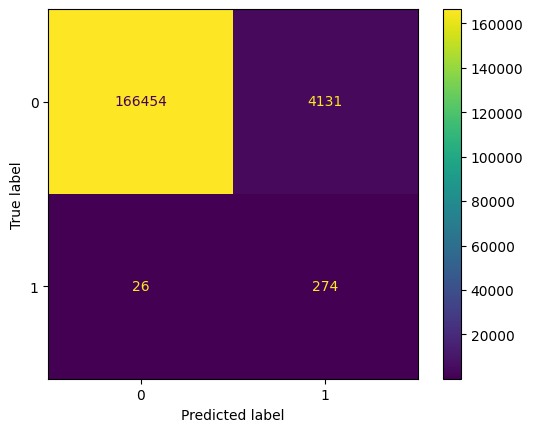

In [47]:

Y_PRED = optimized_logistic_regression_model.predict(X_TEST)

confus_matrix = confusion_matrix(y_true=Y_TEST, y_pred=Y_PRED)

dis = ConfusionMatrixDisplay(confus_matrix)
dis.plot()

The model predictions compared to actual values:

167342 of non-fraudulent transactions predicted correctly
44 cases were predicted as non-fraudulent but were fraudlent 
3257 cases were predicted as fraudulent but were non-fraudulent
242 cases were predicted and confirmed as fraudlent. 

In this use case having false postives is better than having false negatives. Having false postiives leaves it up to human review, while false negative allow for fraud to hide itself amongst non-fraudulent charges.
## Ouptutting Model
Below is the codeblock dedicated to outputting the model for future implemntation in an application.

In [48]:


name = "LogisticRegressionModel.joblib"
joblib.dump(optimized_logistic_regression_model, filename=name)

['LogisticRegressionModel.joblib']